<a href="https://colab.research.google.com/github/dajuctech/Applied-AI-Course/blob/main/DL/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Diagnosis with NN

This notebook contains practical examples and exercises for Applied AI-DL and Optimisation.

*Created by Hansi Hettiarachchi*



This tutorial will guide you through the process of building and optimising neural network models targeting a real-world problem.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import metrics

# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed)
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

**Random seeds**

It is important to set random seeds to fixed values to generate reproducible results.

If the random seeds are not fixed, the initial weights of the neural network will assign randomly, resulting in different models (in terms of weights).

More details on generating reproducible results in Keras are available in the below links.
* [How can I obtain reproducible results using Keras during development?](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development)
* [tf.keras.utils.set_random_seed](https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed)

## Understanding the problem and data set

I use [Breast Cancer Wisconsin (Diagnostic) Data Set
](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) for this tutorial.

Features available with this data set are computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.<br>
The diagnosed labels are 'M' and 'B', which correspond to malignant and benign.  

The targeted problem is to predict the tumour type given the features computed from digitised images. Let's train a simple neural network to make this prediction.

### Load and analyse the data set

In [16]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/main/DL/data/cancer_data.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

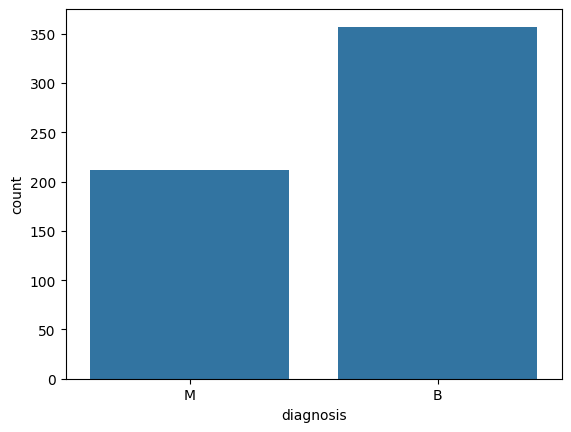

In [19]:
# Summarise class details
sns.countplot(x=df['diagnosis'])

## Extracting labels and features

In [20]:
# extract labels
y = df['diagnosis']

print(y.value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [21]:
# remove unnecessary columns
X = df.drop(['id', 'diagnosis'], axis=1)

print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since we have characters ('M' and 'B') as labels, they need to be converted into numeric values. <br>
This can be easily done using a LabelEncoder

In [22]:
# create LabelEncoder for labels
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [23]:
# Convert labels into numeric values
y = le.transform(y)

y = pd.Series(y)
print(y.value_counts())

0    357
1    212
Name: count, dtype: int64


## M1

As the initial model, let's think about a simple model using 8 features and 2 hidden layers.

![](https://github.com/HHansi/Applied-AI-Course/blob/main/DL/images/Simple_neural_network.png?raw=true)


Let's select the first 8 features for this model.

In [24]:
X1 = X.iloc[:, 0:8]
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


### Split Data

In [25]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 398
validation data set size: 171


### Build Model

A [Sequential](https://keras.io/guides/sequential_model/) model is appropriate for a plain stack of layers.<br>
The layers of network can be defined using [Dense](https://keras.io/api/layers/core_layers/dense/) layers (regular densely-connected NN layers)

More details about model training using Keras can be found in the documentation: [Model training APIs](https://keras.io/api/models/model_training_apis/#compile-method).

In [32]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(12, input_dim=8, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))


model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

* An input layer with 8 features.
* Two hidden layers with 12 and 8 neurons respectively, both using ReLU activation.
* An output layer with 1 neuron using a sigmoid activation to predict the probability of one of the two classes.
* model1.summary() to display a summary of the model.

In [28]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# train model
model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3788 - loss: 23.2904 - val_accuracy: 0.4035 - val_loss: 16.9793
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3788 - loss: 15.5312 - val_accuracy: 0.4035 - val_loss: 9.5766
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3805 - loss: 7.9756 - val_accuracy: 0.4094 - val_loss: 2.4319
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5725 - loss: 1.5196 - val_accuracy: 0.5965 - val_loss: 2.4095
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6223 - loss: 2.2258 - val_accuracy: 0.7427 - val_loss: 0.6400
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7238 - loss: 0.5945 - val_accuracy: 0.6023 - val_loss: 0.8433
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6583 - loss: 0.7960 - val_accuracy: 0.8304 - val_loss: 0.4244
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8010 - loss: 0.4798 - val_accuracy: 0.7836 - val_loss: 0.50

### Validate Model

Validation accuracy is measured in the previous step too. But let's see how to do it separately.

In [30]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.89525425]
 [0.5857462 ]
 [0.99670786]
 [0.114236  ]
 [0.09198245]
 [0.14377804]
 [0.9444162 ]
 [0.9915805 ]
 [0.18874405]
 [0.07328077]]


In [35]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


In [36]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8421052631578947


### Test Predictions

In [37]:
df_test = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/2022/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [39]:
X_test1 = X_test.iloc[:, 0:8]
X_test1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530
1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917
2,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400
3,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.021800
4,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300


In [40]:
test_pred = model1.predict(X_test1)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[4.7745808e-20]
 [1.0380216e-09]
 [4.3475187e-21]
 [3.7732157e-13]
 [0.0000000e+00]
 [5.7185434e-06]]
[0, 0, 0, 0, 0, 0]
['B' 'B' 'B' 'B' 'B' 'B']


## Clear Keras Session

Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names. If you are creating many models in one session, this global state will consume an increasing amount of memory over time.

Calling [clear_session()](https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session) releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

Once the session is cleared, you need to make sure to set back any important states you require (like random state).


In [41]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

## M2

Let's build a more complex model with 30 features and more neurons.

In [42]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split Data

In [43]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 398
validation data set size: 171


### Build Model

In [48]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=30, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4602 - loss: 26.3710 - val_accuracy: 0.5965 - val_loss: 14.1296
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6249 - loss: 7.3088 - val_accuracy: 0.5205 - val_loss: 3.9679
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6708 - loss: 2.6269 - val_accuracy: 0.8187 - val_loss: 1.0409
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7987 - loss: 1.0456 - val_accuracy: 0.8713 - val_loss: 0.5842
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8743 - loss: 0.7894 - val_accuracy: 0.8713 - val_loss: 0.5238
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8157 - loss: 0.7019 - val_accuracy: 0.8713 - val_loss: 0.4963
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8688 - loss: 0.5764 - val_accuracy: 0.8889 - val_loss: 0.4243
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8558 - loss: 0.5432 - val_accuracy: 0.9064 - val_loss: 0.371

### Test Predictions

In [50]:
df_test = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/2022/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [51]:
test_pred = model2.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[8.3379871e-01]
 [8.5534097e-04]
 [9.3573207e-01]
 [1.5515944e-03]
 [1.0000000e+00]
 [1.2606838e-03]]
[1, 0, 1, 0, 1, 0]
['M' 'B' 'M' 'B' 'M' 'B']


**Exercise**

1. What is the best validation loss and validation accuracy of *model2* obtained during the above training process?
2. Is the final model obtained as *model2* the best model we can build?

**Exercise 1: Best Validation Loss & Accuracy for Model2**

* Check the best validation accuracy during model2.fit().

In [58]:
y_pred2 = model2.predict(X_val2)
y_pred_categorical2 = [1 if pred > 0.5 else 0 for pred in y_pred2]
accuracy2 = metrics.accuracy_score(y_val2, y_pred_categorical2)
print(f'Best Validation Accuracy for Model2: {accuracy2}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
Best Validation Accuracy for Model2: 0.9181286549707602


**Exercise 2: Is Model2 the Best Model?**
* Not necessarily!
* Model2 is large, and may overfit.
* Model2_1 or Model2_2 (with early stopping) might perform better.

## Early Stopping

[Early stopping](https://keras.io/api/callbacks/early_stopping/) stops training when a monitored metric has stopped improving.



In [52]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [53]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# define the keras model
model2_1 = keras.Sequential()
model2_1.add(layers.Dense(64, input_dim=30, activation='relu'))
model2_1.add(layers.Dense(32, activation='relu'))
model2_1.add(layers.Dense(1, activation='sigmoid'))

model2_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# compile the keras model
model2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# train model with early stopping
model2_1.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2), callbacks=[callback])

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7389 - loss: 2.5229 - val_accuracy: 0.7953 - val_loss: 0.9118
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7952 - loss: 0.9979 - val_accuracy: 0.8713 - val_loss: 0.7816
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8771 - loss: 0.7656 - val_accuracy: 0.9357 - val_loss: 0.3168
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9175 - loss: 0.5285 - val_accuracy: 0.8889 - val_loss: 0.3747
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8931 - loss: 0.4694 - val_accuracy: 0.9415 - val_loss: 0.3485
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9063 - loss: 0.4193 - val_accuracy: 0.9357 - val_loss: 0.3157
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8961 - loss: 0.3982 - val_accuracy: 0.9357 - val_loss: 0.2760
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9300 - loss: 0.3813 - val_accuracy: 0.9240 - val_loss: 0.2684


**Exercise**

1. What is the validation accuracy of *model2_1* build above? <br>
  **Hint:** You can check your answer by calculating the validation accuracy separately using the approach discussed under [M1>Validate Model](https://colab.research.google.com/drive/1uRq2uAsuT4O5dn-08o4-kUZds1cXfq0o?authuser=1#scrollTo=MCJxLR9HTpQI).
2. Is it the best value achived during the training process?



**Exercise 3: Validation Accuracy of Model2_1**

In [61]:
y_pred2_1 = model2_1.predict(X_val2)
y_pred_categorical2_1 = [1 if pred > 0.5 else 0 for pred in y_pred2_1]
accuracy2_1 = metrics.accuracy_score(y_val2, y_pred_categorical2_1)
print(f'Validation Accuracy of Model2_1: {accuracy2_1}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Validation Accuracy of Model2_1: 0.9239766081871345


### Early Stopping with More Parameters

In [55]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [56]:
callback2 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# define the keras model
model2_2 = keras.Sequential()
model2_2.add(layers.Dense(64, input_dim=30, activation='relu'))
model2_2.add(layers.Dense(32, activation='relu'))
model2_2.add(layers.Dense(1, activation='sigmoid'))

model2_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# compile the keras model
model2_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model2_2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2), callbacks=[callback2])

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3833 - loss: 53.5180 - val_accuracy: 0.5965 - val_loss: 13.2729
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6300 - loss: 15.1962 - val_accuracy: 0.4678 - val_loss: 2.3658
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3878 - loss: 5.8810 - val_accuracy: 0.8070 - val_loss: 0.5711
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7587 - loss: 1.9026 - val_accuracy: 0.7602 - val_loss: 0.9622
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6924 - loss: 1.3860 - val_accuracy: 0.8713 - val_loss: 0.6711
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8532 - loss: 0.9489 - val_accuracy: 0.9240 - val_loss: 0.3202
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8868 - loss: 0.5764 - val_accuracy: 0.9357 - val_loss: 0.3347
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9135 - loss: 0.5087 - val_accuracy: 0.9357 - val_loss: 0.31

**Exercise**

1. What is the validation accuracy of *model2_2* build above? <br>
  **Hint:** You can check your answer by calculating the validation accuracy separately using the approach discussed under [M1>Validate Model](https://colab.research.google.com/drive/1uRq2uAsuT4O5dn-08o4-kUZds1cXfq0o?authuser=1#scrollTo=MCJxLR9HTpQI).
2. Is it the best value achived during the training process?

**Validation Accuracy of Model2_2**

In [62]:
y_pred2_2 = model2_2.predict(X_val2)
y_pred_categorical2_2 = [1 if pred > 0.5 else 0 for pred in y_pred2_2]
accuracy2_2 = metrics.accuracy_score(y_val2, y_pred_categorical2_2)
print(f'Validation Accuracy of Model2_2: {accuracy2_2}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Validation Accuracy of Model2_2: 0.935672514619883


Discuss the following in small groups:
1. Which would be the best model among *model2_1* and *model2_2*?
* Best Model? Likely model2_2 (early stopping & best weight restoration).
2. What monitor metrics can be used with early stopping, and which would be the best?
* Best stopping metric? val_loss is more stable than val_accuracy.
3. How a value for patience can be selected, and what is its impact?
* Patience? Usually 3-5 epochs is a good balance.
4. What are the advantages and disadvantages of early stopping?